In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import ps5lib # Just code from PS5

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. Write a simplistic temporal Poincare section program that takes a fixed trajectory (a list of state-space points with corresponding time), does a simple check on each point to see if the trajectory has pierced the hyperplane $\Sigma : t = n T$ with $n = 1, 2, \ldots$, and plots that point if such a crossing has occurred.**

In [2]:
def temporal_poincare(trajectory, tfunc):
    """
    Poincare Sectioning
    
    :param trajectory: numpy.ndarray
        Trajectory of points from ODE solver.
        Formatted such that row[:-1] are points and row[-1] is the time.
    :param tfunc: function(int)
        Function that accepts integer argument and returns the next time.
        This function forms the intersected hyperplane.
    :return: np.ndarray()
        List of indices of which cross the hyperplane
    """
    # Get s_0
    n = 1
    t = tfunc(n)
    
    points = []
    for i in range(len(trajectory)):
        point = trajectory[i]
        # If t_i > s_0
        if point[-1] > t:
            points.append(i)
            # jump forward m steps to account for adaptive timestep solvers
            while t < point[-1]:
                n += 1
                t = tfunc(n)
    return np.array(points)

**(a) Test this problem on the trajectory from problem 2b on PS4. Use the same timestep as in PS4 and the surface of section $\Sigma : t = nT_0$, where $T_0$ is the natural period of the device and $n = 1, 2, \ldots$ Turn in a plot of the sectioned trajectory. Remember to use $\theta \mod 2\pi$ on the horizontal axis. Is this what you expected to see?**

First we acquire our Problem Set 4, question 2b data, and then we analyze.

Plotting 787/100001 points


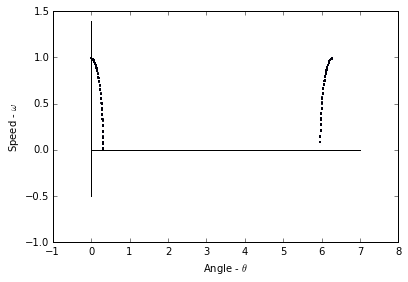

In [91]:
pendulum = lambda t, y: np.array([y[1], -((9.8 * np.sin(y[0])) / 0.1)])

data = ps5lib.mrk4(pendulum, 0, np.array([0.1, 0], dtype=np.float64), 0.005, int(1e5))

tfunc = lambda n: 2 * np.pi * np.sqrt(0.1 / 9.8) * n

poincare_data = data[temporal_poincare(data, tfunc)]

print('Plotting {}/{} points'.format(len(poincare_data), len(data)))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0] % 2 * np.pi, poincare_data[:, 1], s=1)
ax.plot(np.arange(0, 8, 1), np.zeros(8), 'k-')
ax.plot(np.zeros(20), np.arange(-0.5, 1.5, 0.1), 'k-')
plt.xlabel(r'Angle - $\theta$')
plt.ylabel(r'Speed - $\omega$')
plt.show()

This is not what I expected to see, as if we were to take a snapshot of the system every $2 \pi \sqrt{\frac{l}{g} }$ seconds then the system should not appear to move, as it will be oscillating at the exact frequency of our "photos". However, that being said our system is not perfect, which means that error is introduced into the system. This error results in the system appearing to gradually shift, but still follow is calculated path (from PS4.2b).

**(b) Repeat (a), but with some different $T$ that is not rationally related to $T_0$. Explain the differences between the plots.**

Plotting 500/10001 points


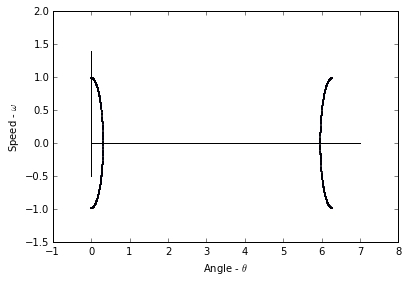

In [92]:
pendulum = lambda t, y: np.array([y[1], -((9.8 * np.sin(y[0])) / 0.1)])

data = ps5lib.mrk4(pendulum, 0, np.array([0.1, 0], dtype=np.float64), 0.005, int(1e4))

tfunc = lambda n: 0.1 * n

poincare_data = data[temporal_poincare(data, tfunc)]

print('Plotting {}/{} points'.format(len(poincare_data), len(data)))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0] % 2 * np.pi, poincare_data[:, 1], s=1)
ax.plot(np.arange(0, 8, 1), np.zeros(8), 'k-')
ax.plot(np.zeros(20), np.arange(-0.5, 1.5, 0.1), 'k-')
plt.xlabel(r'Angle - $\theta$')
plt.ylabel(r'Speed - $\omega$')
plt.show()

The difference here is that the second plot is a much better representation of the system's solution as there is no interference from the pendulum's frequency. This lack of interference means that the entire system is calculated with less points, as is the purpose of this Poincare section.

**(c) Repeat (a) for one of the chaotic pendulum trajectories that you generated in problem 6 on PS4. Use $\Sigma: t = n T_{drive}$, where $T_{drive}$ is the drive period, and plot at least 1000 points.**

Plotting 1575/200001 points from 0.0 to 999.999999999163


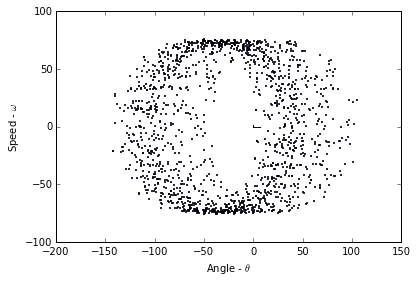

In [93]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 1
A     = 2
g     = 9.8

pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = ps5lib.mrk4(pendulum, 0, np.array([2, 0], dtype=np.float64), 0.005, int(2e5))

tfunc = lambda n: 2 * np.pi * np.sqrt(0.1 / 9.8) * n

poincare_data = data[temporal_poincare(data, tfunc)]

print('Plotting {}/{} points from {} to {}'.format(len(temporal_poincare(data, tfunc)),
                                                   len(data), data[0, -1], data[-1, -1]))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0], poincare_data[:, 1], s=1)
ax.plot(np.arange(0, 8, 1), np.zeros(8), 'k-')
ax.plot(np.zeros(20), np.arange(-0.5, 1.5, 0.1), 'k-')
plt.xlabel(r'Angle - $\theta$')
plt.ylabel(r'Speed - $\omega$')
plt.show()

**(d) Raise the step size that you use to generate the test trajectory, keeping the timespan covered by the trajectory constant, and describe the effects on the plot in part (c). Why does this happen?**

Plotting 1575 points from 0.0 to 999.9999999996382


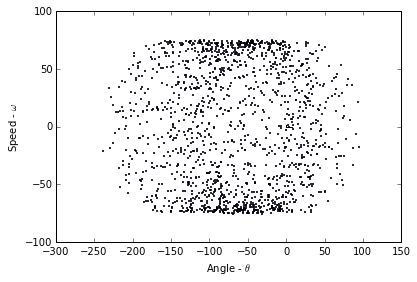

In [94]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 1
A     = 2
g     = 9.8

pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = ps5lib.mrk4(pendulum, 0, np.array([2, 0], dtype=np.float64), 0.05, int(2e4))

tfunc = lambda n: 2 * np.pi * np.sqrt(0.1 / 9.8) * n

poincare_data = data[temporal_poincare(data, tfunc)]

print('Plotting {} points from {} to {}'.format(len(temporal_poincare(data, tfunc)),
                                                data[0, -1], data[-1, -1]))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0], poincare_data[:, 1], s=1)
ax.plot(np.arange(0, 8, 1), np.zeros(8), 'k-')
ax.plot(np.zeros(20), np.arange(-0.5, 1.5, 0.1), 'k-')
plt.xlabel(r'Angle - $\theta$')
plt.ylabel(r'Speed - $\omega$')
plt.show()

We note that with the adjusted stepsize the system becomes much less clear, as the points are now much less precise. If we adjust the stepsize too far we get chaos for this same reason.

**2. Now make your Poincare section algorithm more intelligent about how it finds the point of intersection with the hyperplane, using a linear interpolation between the two trajectory points that fall on either side of $\Sigma$ to approximate the actual point of piercing.**

In [95]:
def temporal_poincare_interpolated(trajectory, tfunc):
    """
    Poincare Sectioning
    
    :param trajectory: numpy.ndarray
        Trajectory of points from ODE solver.
        Formatted such that row[:-1] are points and row[-1] is the time.
    :param tfunc: function(int)
        Function that accepts integer argument and returns the next time.
        This function forms the intersected hyperplane.
    :return: np.ndarray()
        List of indices of which cross the hyperplane
    """
    # Get s_0
    n = 1
    t = tfunc(n)
    
    points = []
    for i in range(len(trajectory)):
        # If t_i > s_0
        if trajectory[i, -1] > t:
            interpolatedline = lambda t: np.array([(trajectory[i, 0] +
                                ((trajectory[i - 1, 0] - trajectory[i, 0]) /
                                 (trajectory[i - 1, -1] - trajectory[i, -1])) *
                               (t - trajectory[i, -1])),
                               (trajectory[i, 1] +
                                ((trajectory[i - 1, 1] - trajectory[i, 1]) /
                                 (trajectory[i - 1, -1] - trajectory[i, -1])) *
                               (t - trajectory[i, -1])),
                               t])
            points.append(interpolatedline(t))
            # jump forward m steps to account for adaptive timestep solvers
            while t < trajectory[i, -1]:
                n += 1
                t = tfunc(n)
    return np.array(points)

**(a) Repeat parts (c) and (d) of problem 1 using this new algorithm. Describe and explain any differences between the two sets of plots.**

Plotting 1575/200001 points from 0.0 to 999.999999999163


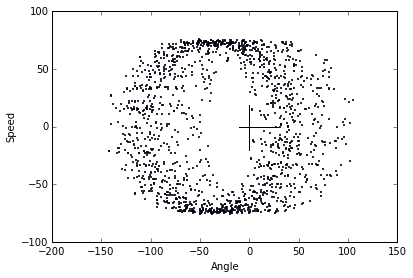

In [96]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 1
A     = 2
g     = 9.8

pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = ps5lib.mrk4(pendulum, 0, np.array([2, 0], dtype=np.float64), 0.005, int(2e5))

tfunc = lambda n: 2 * np.pi * np.sqrt(0.1 / 9.8) * n

poincare_data = temporal_poincare_interpolated(data, tfunc)

print('Plotting {}/{} points from {} to {}'.format(len(temporal_poincare(data, tfunc)),
                                                   len(data), data[0, -1], data[-1, -1]))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0], poincare_data[:, 1], s=1)
ax.plot(np.arange(-10, 30), np.zeros(40), 'k-')
ax.plot(np.zeros(40), np.arange(-20, 20, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

Plotting 1575 points from 0.0 to 999.9999999996382


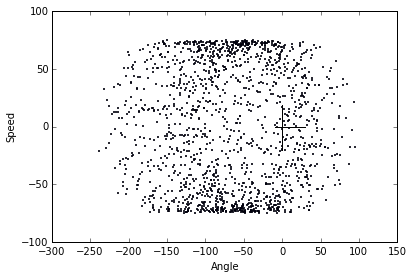

In [97]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 1
A     = 2
g     = 9.8

pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = ps5lib.mrk4(pendulum, 0, np.array([2, 0], dtype=np.float64), 0.05, int(2e4))

tfunc = lambda n: 2 * np.pi * np.sqrt(0.1 / 9.8) * n

poincare_data = temporal_poincare_interpolated(data, tfunc)

print('Plotting {} points from {} to {}'.format(len(temporal_poincare(data, tfunc)),
                                                data[0, -1], data[-1, -1]))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(poincare_data[:, 0], poincare_data[:, 1], s=1)
ax.plot(np.arange(-10, 30), np.zeros(40), 'k-')
ax.plot(np.zeros(40), np.arange(-20, 20, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

The advantage that linear interpolation offers is that each point is much more precise, as we've narrowed down the exact "spot" where our system crosses the hyperplane. This means that these two plots are better than the prior two.